In [ ]:
!git clone https://github.com/kobrue02/evaluating-llm-generated-nlu-data/
%cd evaluating-llm-generated-nlu-data

In [2]:
import json
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

'/Users/birdy/Desktop/thesis/bin'

In [8]:
from bin.utils.read_datasets import read_sipgate_dataset
from bin.utils.clean_sipgate_dataset import clean_sipgate_dataset
from bin.framework.framework import Framework

In [9]:
import logging
logging.basicConfig(level=logging.INFO)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Loaded model BertForMaskedLM and tokenizer BertTokenizerFast


{'perplexity': np.float64(1.1844615258239917),
 'diversity': 0.9615384615384616,
 'coherence': np.float32(0.99999994)}

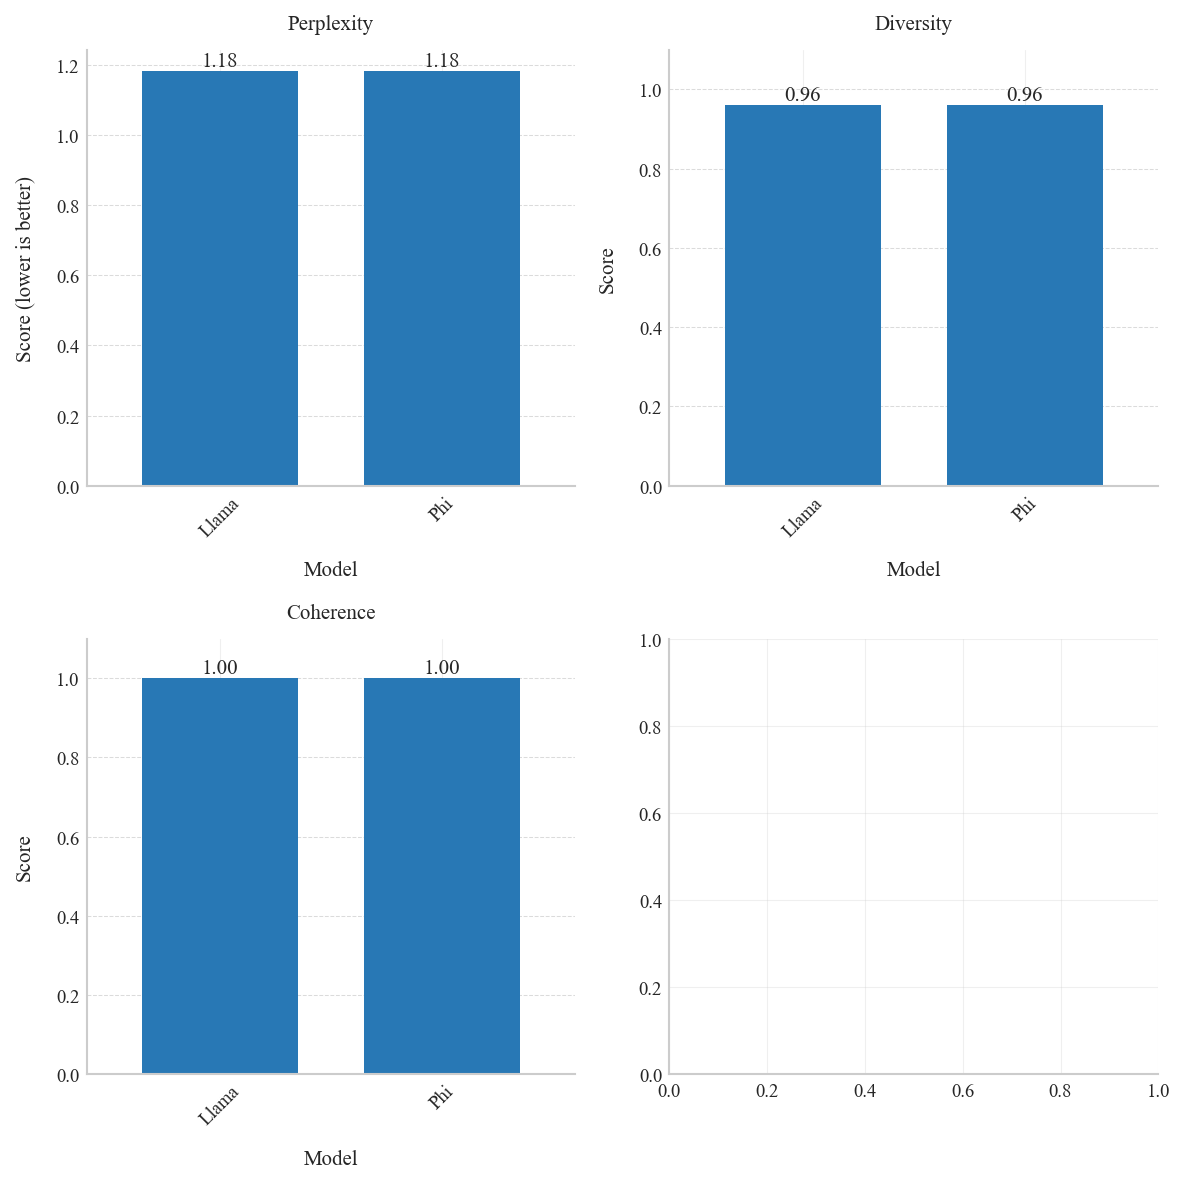

(<Figure size 1200x1200 with 4 Axes>,
 array([[<Axes: title={'center': 'Perplexity'}, xlabel='Model', ylabel='Score (lower is better)'>,
         <Axes: title={'center': 'Diversity'}, xlabel='Model', ylabel='Score'>],
        [<Axes: title={'center': 'Coherence'}, xlabel='Model', ylabel='Score'>,
         <Axes: >]], dtype=object))

In [5]:
def results_to_dataframe(results: list[dict]):
    # Initialize an empty DataFrame
    columns = ["intent"] + list(list(results[0].values())[0]["results"].keys())
    df = pd.DataFrame(columns=columns)
    df.set_index("intent", inplace=True)

    # Process each intent dictionary
    for intent_dict in results:
        for intent_name, data in intent_dict.items():
            results = data["results"]
            df.loc[intent_name] = results

    df["intent"] = df.index
    df.reset_index(drop=True, inplace=True)

    return df

In [ ]:
def plot_results_df(df: pd.DataFrame, plot_func=plt.hist):
    # make a dashboard of plots
    # where each plot is the distribution of a metric
    # across all intents
    n_metrics = len([col for col in df.columns if not df[col].isnull().all()]) - 1
    n_cols = 2
    n_rows = n_metrics // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axs = axs.flatten()

    for i, metric in enumerate(df.columns[1:]):
        if metric == "intent" or df[metric].isnull().all():
            continue

        x, y = df[metric].index, df[metric].values

        ax = axs[i]
        sns.swarmplot(
            data=y,
            ax=ax,
            color="blue",
            alpha=0.5,
            linewidth=0,
        )
        ax.set_title(metric)
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")

    plt.tight_layout()
    plt.show()

In [ ]:
dataset_name = "few_shot_simple_data"
gen_df = pd.read_csv("data/{dataset_name}.csv")
ref_df = clean_sipgate_dataset(read_sipgate_dataset())

In [ ]:
framework = Framework()
results = framework.apply_framework_to_datasets(gen_df, ref_df)
df = results_to_dataframe(results)
plot_results_df(df)